In [48]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn  

In [ ]:
df = pd.read_csv("medical_examination.csv")

df['height'] = df['height'] / 100 
df['overweight'] = (df['weight']/(df['height']**2) > 25).astype(int) # Aqui o código ao mesmo tempo calcula o IMC e diz se deve ser 0 para falso e 1 para verdadeiro, já colocando na coluna como int

# Aqui o código transforma todos os valores maiores que 1 em 1 e menores que um em 0 para padronizar (1 ruim e 0 bom)
df['cholesterol'] = ((df['cholesterol'] > 1).astype(int))
df['gluc'] = ((df['gluc'] > 1).astype(int))

# Aqui é definida a função para desenhar o gráfico de barras
def draw_cat_plot():
    # Aqui o código vai transformar o df em um outro formato de linhas e colunas, parecido com uam tabela
    df_cat = pd.melt(df, id_vars = ['cardio'], value_vars = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
    df_cat['total'] = 1
    df_cat = df_cat.groupby(['cardio', 'variable', 'value'], as_index = False).count() #Essa linha que define o gráfico. Aqui vai agrupar de uma forma que será possível identificar a relação entre cardio, colesterol e glicose.
    sns.set_theme(style='ticks')
    fig = sns.catplot(x = 'variable', y = 'total', data = df_cat, hue = 'value', kind = 'bar', col = 'cardio').figure
    fig.savefig('catplot.png')

def draw_heat_map():
    #Aqui nessa primeira linha o código irá remover todos os outliers 
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) & (df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975)) & (df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] <= df['weight'].quantile(0.975))]
    corr = df_heat.corr(method="pearson") # Aqui o código calcula a matriz de correlação com um método do numpy
    mask = np.triu(corr) # Aqui o código calcula e aplica a máscara do triângulo superior da matriz para o heatmap 
    fig, ax = plt.subplots(figsize = (12,12))
    sns.heatmap(corr, linewidths=1, annot = True, square = True, mask = mask, fmt = ".1f", center = 0.08, cbar_kws = {"shrink":0.5}).figure

    fig.savefig('heatmap.png')


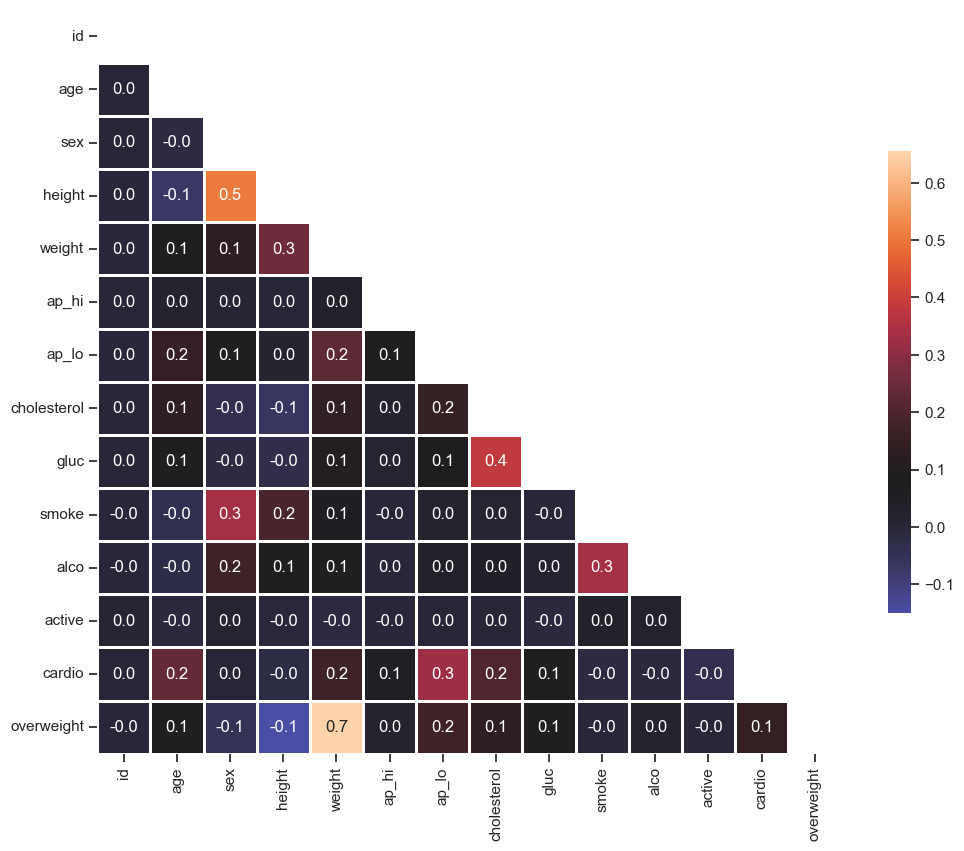

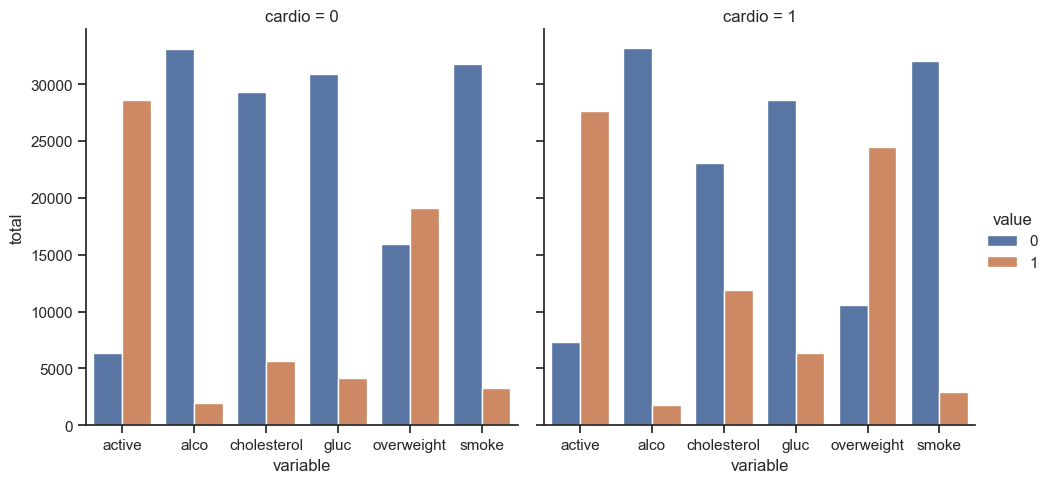

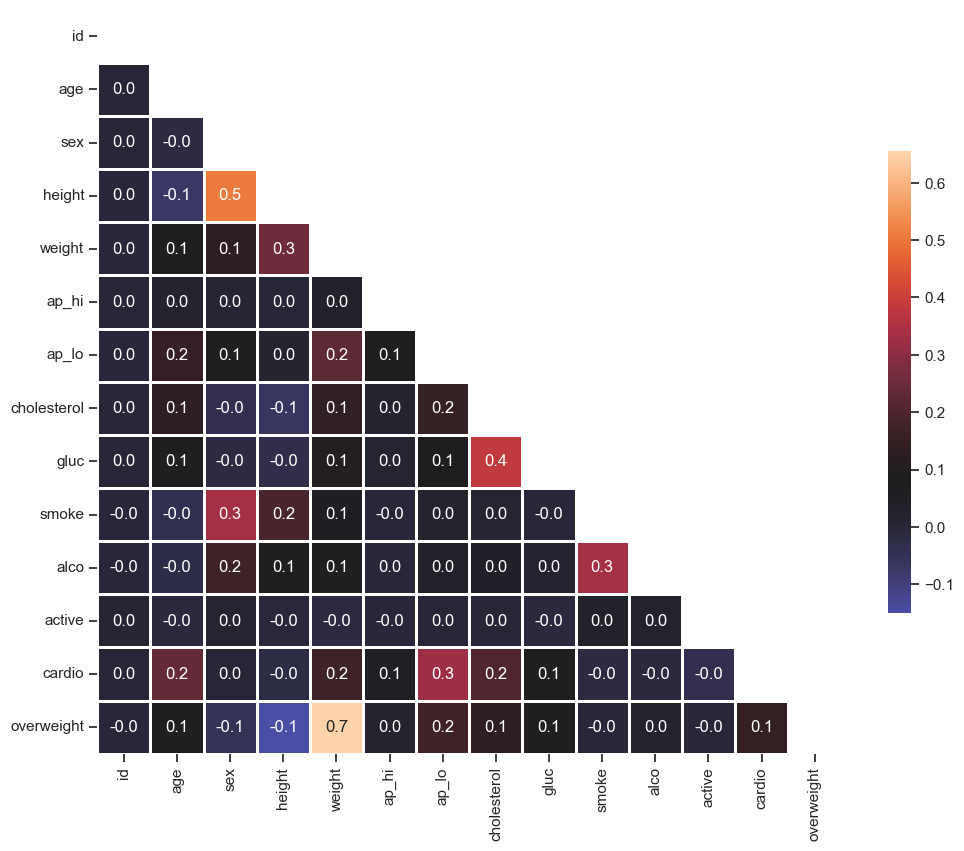

In [80]:
draw_cat_plot()
draw_heat_map()